In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.applications import resnet50, vgg16, xception, inception_resnet_v2, mobilenet_v2, densenet
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
train_dataset = "/content/drive/MyDrive/MachineLearning_dataset/data/train"
test_dataset = "/content/drive/MyDrive/MachineLearning_dataset/data/test"

In [ ]:
height, width = (224, 224) 
epochs_no = 30
classes_name = ('benign','malignant')
batch_size = 30
imgdatagen = ImageDataGenerator(rescale = 1./255) 

imgdatagen1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_pre_dataset = imgdatagen .flow_from_directory(train_dataset, target_size = (height, width), 
                classes = classes_name,  batch_size = batch_size)

val_pre_dataset = imgdatagen1 .flow_from_directory(test_dataset, target_size = (height, width), 
                classes = classes_name, batch_size = batch_size)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
base_model= ResNet50(include_top=False, weights="imagenet", input_shape=(height, width,3))

ResNet_model= Sequential()
ResNet_model.add(base_model)
ResNet_model.add(Conv2D(64, (3, 3), activation = 'relu'))
#ResNet_model.add(Dropout(0.3))
ResNet_model.add(Conv2D(64, (3, 3), activation = 'relu'))
ResNet_model.add(MaxPooling2D(pool_size = (2, 2)))
#ResNet_model.add(Dropout(0.3))
ResNet_model.add(Flatten())
ResNet_model.add(Dense(512,activation='relu'))
ResNet_model.add(Dense(256,activation='relu'))
#ResNet_model.add(Dropout(0.3))
ResNet_model.add(Dense(128,activation='relu'))
ResNet_model.add(Dense(64,activation='relu'))
ResNet_model.add(Dense(32,activation='relu'))
ResNet_model.add(Dense(16,activation='relu'))
ResNet_model.add(Dense(8,activation='relu'))
ResNet_model.add(Dense(2, activation='softmax'))
ResNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1179712   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 512)               33280     
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 256)              

In [ ]:
ResNet_model.compile(optimizer=optimizers.Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [ ]:
ResNet_history = ResNet_model.fit_generator(generator=train_pre_dataset,
                            steps_per_epoch=train_pre_dataset.samples//train_pre_dataset.batch_size,
                            validation_data=val_pre_dataset,
                            verbose=1,
                            validation_steps=val_pre_dataset.samples//val_pre_dataset.batch_size,
                            epochs=epochs_no,
                            callbacks=[ModelCheckpoint("resnet50.h5", monitor='val_accuracy',save_weights_only=True, mode='max', save_best_only=True, verbose=2)]) #callbacks=[learn_control])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
87/87 [==============================] - 37s 369ms/step - loss: 0.5211 - accuracy: 0.7430 - val_loss: 132.0574 - val_accuracy: 0.5455

Epoch 00001: val_accuracy improved from -inf to 0.54545, saving model to resnet50.h5
Epoch 2/30
87/87 [==============================] - 32s 364ms/step - loss: 0.4696 - accuracy: 0.7733 - val_loss: 0.6957 - val_accuracy: 0.4545

Epoch 00002: val_accuracy did not improve from 0.54545
Epoch 3/30
87/87 [==============================] - 31s 355ms/step - loss: 0.4329 - accuracy: 0.7936 - val_loss: 0.6853 - val_accuracy: 0.5455

Epoch 00003: val_accuracy did not improve from 0.54545
Epoch 4/30
87/87 [==============================] - 31s 361ms/step - loss: 0.4218 - accuracy: 0.8051 - val_loss: 0.6887 - val_accuracy: 0.5455

Epoch 00004: val_accuracy did not improve from 0.54545
Epoch 5/30
87/87 [==============================] - 31s 358ms/step - loss: 0.4209 - accuracy: 0.8163 - val_loss: 0.6893 - val_accuracy: 0.5455

Epoch 00005: val_accuracy di

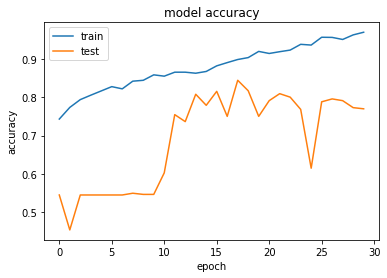

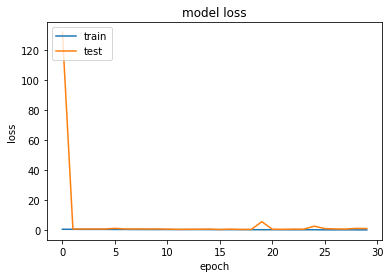

In [ ]:
plt.plot(ResNet_history.history['accuracy'])
plt.plot(ResNet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ResNet_history.history['loss'])
plt.plot(ResNet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()